# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
!pip install

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import sklearn

In [100]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,293,93,36,63,139,57,8,132,50,18,136,158,260,121,67,3,27,193,201
1,459,98,42,90,192,61,9,178,37,21,144,189,480,138,61,3,8,199,208
2,427,86,38,89,176,59,9,169,39,20,132,190,428,148,67,7,33,193,202
3,681,96,46,70,194,70,6,167,39,20,148,183,427,171,69,17,10,200,203
4,786,107,55,103,213,68,11,219,30,25,172,221,709,216,70,10,7,187,197
5,712,105,45,100,195,61,10,198,33,23,149,214,586,186,67,8,5,192,200
6,562,113,53,93,197,62,11,216,31,24,165,221,688,196,72,6,25,188,199
7,639,108,55,105,230,68,11,218,30,24,171,228,709,210,69,14,4,190,197
8,117,109,53,109,221,69,12,221,31,25,169,226,712,212,72,13,28,188,201
9,680,95,46,76,162,66,11,162,42,20,155,175,381,172,74,8,4,184,193


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,432.114754,93.839709,44.765027,81.872495,169.358834,61.817851,8.433515,168.934426,40.865209,20.588342,147.571949,188.744991,440.672131,174.539162,72.449909,6.557377,12.568306,189.030965,195.491803
std,240.666501,8.335779,6.190806,15.647408,32.834864,7.971412,4.491440,33.163102,7.790602,2.588917,14.451808,31.241299,176.701194,32.845869,7.308114,5.006099,9.010809,6.200788,7.435024
min,0.000000,77.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,177.000000,181.000000
25%,225.000000,87.000000,40.000000,70.000000,142.000000,57.000000,6.000000,147.000000,34.000000,19.000000,136.000000,167.000000,319.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,431.000000,93.000000,44.000000,79.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,644.000000,100.000000,49.000000,96.000000,195.000000,65.000000,10.000000,195.000000,46.000000,22.000000,159.000000,216.000000,575.000000,198.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,322.000000,133.000000,52.000000,265.000000,61.000000,29.000000,186.000000,287.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [55]:
### YOUR CODE HERE
for class_n in np.unique(y_train):
    print("№", class_n, ":", (y_train == class_n).sum())

№ bus : 141
№ opel : 140
№ saab : 141
№ van : 127


In [60]:
def mk_pipeline(model):
    return Pipeline([
        ("Scaler", StandardScaler()),
        ("Model", model),
    ])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
#!pip install scikit-plot

In [94]:
from scikitplot.metrics import plot_roc
params_grid = {
    "Model__penalty": ["l1", "l2"],
    "Model__C": [0.1, 1, 5, 10]
}
model = mk_pipeline(LogisticRegression(solver='saga', max_iter=1000))
grid_search = GridSearchCV(model, params_grid, refit=True)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    grid_search.fit(X_train, y_train)

In [95]:
grid_search.best_params_

{'Model__C': 10, 'Model__penalty': 'l1'}

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

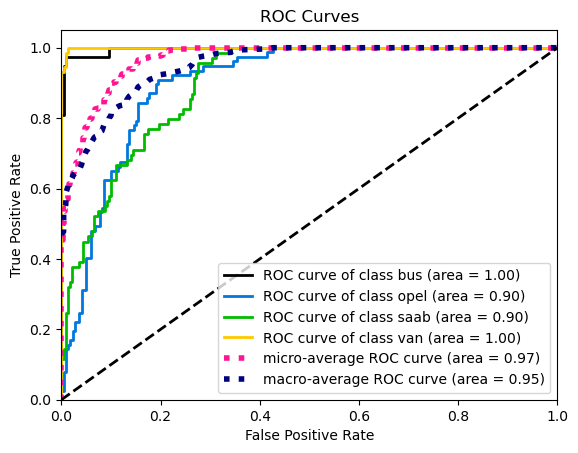

In [96]:
y_pred = grid_search.best_estimator_.predict_proba(X_test)
plot_roc(y_test, y_pred)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explained variance plot.

In [106]:
explained_var_cumsum

array([0.62476661, 0.98537853, 0.99175353, 0.99598726, 0.99746487,
       0.99817905, 0.99868327, 0.99911672, 0.99938263, 0.99962292,
       0.99974841, 0.99984456, 0.99990403, 0.99994911, 0.99997382,
       0.9999898 , 0.99999689, 0.99999928, 1.        ])

In [97]:
# YOUR CODE HERE
n_features = X_train.shape[1]
pca = PCA()
pca.fit(X_train)

PCA()

In [111]:
explained_var = pca.explained_variance_ratio_
explained_var_cumsum = np.cumsum(explained_var)
explained_var[:19]

array([6.24766615e-01, 3.60611915e-01, 6.37500291e-03, 4.23372428e-03,
       1.47761079e-03, 7.14185500e-04, 5.04214493e-04, 4.33453497e-04,
       2.65912687e-04, 2.40283810e-04, 1.25491423e-04, 9.61529979e-05,
       5.94710443e-05, 4.50778433e-05, 2.47110153e-05, 1.59745986e-05,
       7.08913354e-06, 2.39837880e-06, 7.15588243e-07])

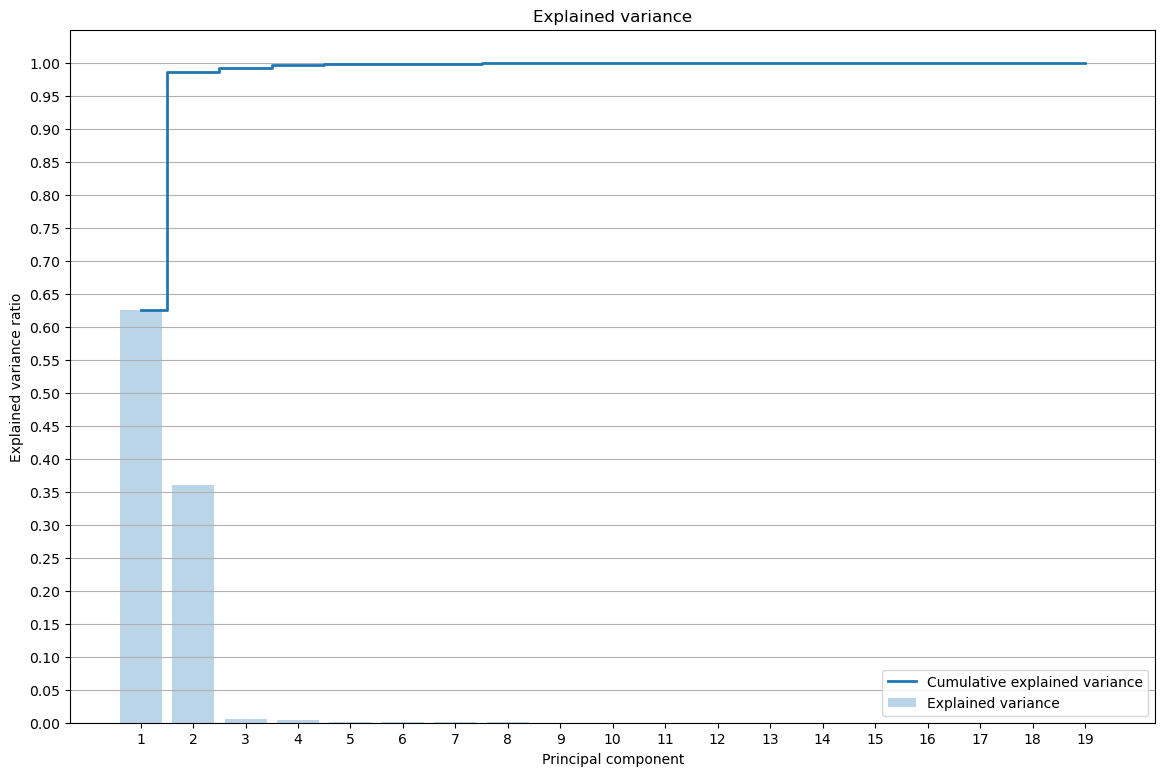

In [112]:
plt.figure(figsize=(14, 9))
plt.title("Explained variance")
plt.bar(range(1, n_features + 1), pca.explained_variance_ratio_, alpha=0.3, align="center", label="Explained variance")
plt.step(range(1, n_features + 1), explained_var_cumsum, label="Cumulative explained variance", linewidth=2, where="mid")
plt.xticks(range(1, n_features + 1))
plt.yticks(np.arange(0, 1.01, 0.05))
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.grid(axis="y")
plt.legend()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

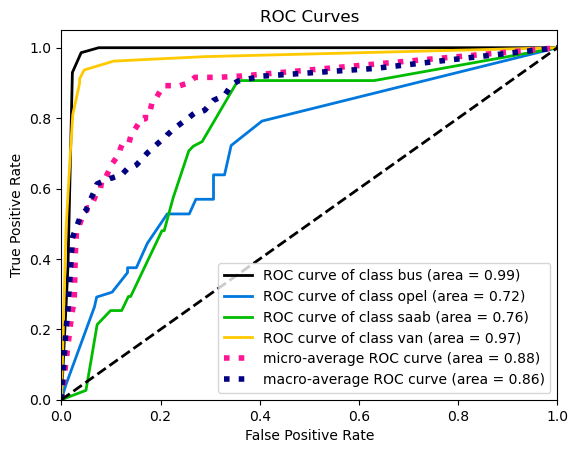

In [37]:

param_grid = {"max_depth": range(3, 10)}
model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=3)
model.fit(X_train, y_train)
model.predict_proba(X_test)
plot_roc(y_test, model.predict_proba(X_test))
# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [50]:
X_pca = Pipeline([
    ("Scale", StandardScaler()),
    ("PCA", PCA(n_components=0.95)),
]).fit_transform(X_train)

plt.figure(figsize=(14, 9))
plt.title("Dataset after PCA")
for class_name in np.unique(y_train):
    indeces = (y_train == class_name)
    plt.scatter(X_pca[indeces,0], X_pca[indeces,1], label=class_name)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

NameError: name 'Pipeline' is not defined

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [ ]:
# YOUR CODE HERE